In [2]:
%load_ext autoreload
# %reload_ext autoreload

In [9]:
import os
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
import numpy as np
import matplotlib.pylab as plt
from pycaret.regression import *
from pathlib import Path

In [10]:
# from pycaret.utils import version
# version()

In [73]:
%autoreload
import sys
sys.path.append(sys.path[0][0:-4] + 'mikael')
from pipeline import Pipin
pipin = Pipin()

In [87]:
df_0 = pipin.get_combined_datasets(consecutive_threshold=6, data_sets=set(["A"]))

In [88]:
df = df_0.copy()
df.head(15)

,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,date_calc,is_estimated:idx,day_of_year,hour,month,pv_measurement,location:idx
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000e+00,0.000000,1744.900024,0.0,280.299988,0.000000,...,-3.6,-0.8,-0.0,NaT,0,153,22,6,0.00,A
1,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000e+00,0.000000,1703.599976,0.0,280.299988,0.000000,...,-3.5,0.0,-0.0,NaT,0,153,23,6,0.00,A
2,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000e+00,0.000000,1668.099976,0.0,280.200012,0.000000,...,-3.1,0.7,-0.0,NaT,0,154,0,6,0.00,A
3,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000e+00,0.000000,1388.400024,0.0,281.299988,0.000000,...,-2.7,0.8,-0.0,NaT,0,154,1,6,0.00,A
4,2019-06-03 02:00:00,8.8,1.219,1108.500000,6.546900e+03,9.800000,1108.500000,0.0,282.299988,4.300000,...,-2.5,1.0,-0.0,NaT,0,154,2,6,19.36,A
5,2019-06-03 03:00:00,9.1,1.217,828.599976,1.022259e+05,53.900002,828.599976,0.0,282.899994,29.100000,...,-2.2,0.9,-0.0,NaT,0,154,3,6,251.02,A
6,2019-06-03 04:00:00,9.4,1.215,777.200012,3.432068e+05,143.500000,777.200012,0.0,283.299988,72.599998,...,-2.3,0.6,-0.0,NaT,0,154,4,6,263.78,A
7,2019-06-03 05:00:00,9.7,1.209,725.299988,7.252346e+05,262.700012,725.299988,0.0,283.799988,120.800003,...,-2.0,1.0,-0.0,NaT,0,154,5,6,522.72,A
8,2019-06-03 06:00:00,9.7,1.204,672.799988,1.180469e+06,393.799988,672.799988,0.0,283.799988,159.199997,...,-1.9,0.9,-0.0,NaT,0,154,6,6,904.42,A
9,2019-06-03 07:00:00,9.3,1.206,665.000000,1.651958e+06,522.599976,665.000000,0.0,283.299988,197.699997,...,-1.3,2.5,-0.0,NaT,0,154,7,6,1238.82,A


In [128]:
# selected_feature = pipin.get_features_selection(df)
# df = df[selected_feature]
# ignore_features = pipin.get_irrelevant_features(df, feature_selection=True) #+ to_ignore
# categorical_features = pipin.get_categorical_features(df, feature_selection=True)
ignore_features = pipin.get_irrelevant_features(df)
categorical_features = pipin.get_categorical_features(df)


In [129]:
# s = setup(df_transformed, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False)
s = setup(df, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False, fold_shuffle=True)
# s = setup(df, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False, fold_shuffle=True, feature_selection=True, feature_selection_estimator="et", n_features_to_select=30)
# s = setup(df, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False, imputation_type="iterative", feature_selection="classic", feature_selection_estimator="et", remove_multicollinearity=True, remove_outliers = True, low_variance_threshold = 0.1,)
# s = setup(df, target="pv_measurement", imputation_type="iterative", feature_selection="classic", feature_selection_estimator="et", remove_multicollinearity=True, remove_outliers = True, low_variance_threshold = 0.1,  normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False,)

,Description,Value
0,Session id,5102
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(21282, 53)"
4,Transformed data shape,"(21282, 56)"
5,Transformed train set shape,"(14897, 56)"
6,Transformed test set shape,"(6385, 56)"
7,Ignore features,2
8,Ordinal features,3
9,Numeric features,43


In [116]:
preprocessed_data = s.dataset_transformed
preprocessed_data
print(preprocessed_data.shape)
# print (preprocessed_data.columns)
preprocessed_data.tail(20)

(21282, 31)


,absolute_humidity_2mgm3,air_density_2mkgm3,ceiling_height_aglm,clear_sky_energy_1hJ,clear_sky_radW,cloud_base_aglm,dew_point_2mK,diffuse_radW,diffuse_rad_1hJ,direct_radW,...,t_1000hPaK,total_cloud_coverp,visibilitym,wind_speed_10mms,wind_speed_u_10mms,wind_speed_v_10mms,day_of_year,hour,month,pv_measurement
21262,5.9,1.231,4425.600098,1.877269e+06,478.200012,1140.800049,276.500000,168.500000,582776.625000,192.399994,...,283.399994,98.699997,40731.199219,6.9,-6.9,0.7,103.0,14.0,4.0,1777.819946
21263,8.8,1.237,689.299988,1.592860e+04,15.000000,352.399994,282.200012,2.900000,5247.399902,0.000000,...,282.899994,100.000000,7080.700195,4.3,4.3,0.2,165.0,2.0,6.0,0.000000
21264,10.0,1.217,304.299988,0.000000e+00,0.000000,304.299988,284.200012,0.000000,0.000000,0.000000,...,285.399994,99.000000,9068.900391,2.3,2.3,-0.5,172.0,0.0,6.0,0.000000
21265,9.3,1.243,3007.797393,0.000000e+00,0.000000,981.200012,283.000000,0.000000,0.000000,0.000000,...,285.200012,2.100000,36283.199219,3.2,-2.9,-1.2,229.0,23.0,8.0,0.000000
21266,7.2,1.243,827.599976,1.300000e+03,0.000000,827.599976,279.200012,0.000000,7315.799805,0.000000,...,281.399994,37.000000,33812.300781,3.5,3.5,-0.2,185.0,22.0,7.0,0.000000
21267,11.3,1.209,5491.600098,1.112830e+06,374.399994,421.299988,286.200012,151.600006,464551.093750,44.700001,...,288.100006,97.900002,13508.799805,2.0,2.0,0.3,225.0,7.0,8.0,955.239990
21268,11.0,1.192,9749.200195,1.525055e+06,358.299988,2324.300049,286.299988,76.400002,294635.406250,236.300003,...,294.700012,67.500000,54386.101562,3.3,2.4,-2.3,177.0,17.0,6.0,1195.479980
21269,13.3,1.193,4705.899902,1.932908e+06,475.500000,4341.299805,288.899994,153.199997,481501.500000,12.500000,...,292.600006,100.000000,45413.199219,2.4,-2.3,0.8,193.0,16.0,7.0,483.779999
21270,7.5,1.240,1437.300049,1.829666e+06,566.599976,637.400024,280.000000,167.199997,533383.000000,113.099998,...,282.600006,89.400002,50151.398438,2.5,2.3,1.0,209.0,8.0,7.0,1555.619995
21271,10.0,1.220,1586.599976,0.000000e+00,0.000000,1577.500000,284.100006,0.000000,0.000000,0.000000,...,285.600006,100.000000,2920.199951,1.1,1.0,0.3,174.0,1.0,6.0,0.000000


In [117]:
modeller = models()
modell_navn = pd.DataFrame(modeller)
# modell_navn = modell_navn["ID"]
navn = list(modell_navn.index)
navn

['lr',
 'lasso',
 'ridge',
 'en',
 'lar',
 'llar',
 'omp',
 'br',
 'ard',
 'par',
 'ransac',
 'tr',
 'huber',
 'kr',
 'svm',
 'knn',
 'dt',
 'rf',
 'et',
 'ada',
 'gbr',
 'mlp',
 'xgboost',
 'lightgbm',
 'dummy']

In [130]:
# top3 = compare_models(n_select = 3, sort = 'MAE')
extra_trees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,302.9540,285115.1296,533.9617,0.8427,0.7691,1.4263
1,290.2051,253862.3042,503.8475,0.8573,0.7628,1.4619
2,295.1479,267898.5964,517.5892,0.8559,0.6843,1.3220
3,297.5674,282187.6066,531.2133,0.8423,0.7201,1.9741
4,300.0941,290218.2806,538.7191,0.8236,0.7229,1.3970
5,322.4196,304326.1243,551.6576,0.8232,0.7641,1.7586
6,310.4577,290994.2299,539.4388,0.8440,0.7454,1.5763
7,307.5117,295221.5056,543.3429,0.8399,0.7318,1.6007
8,309.1074,286349.3551,535.1162,0.8515,0.7593,2.0533


In [131]:
lightgmb = create_model('lightgbm', sort='MAE')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,301.9908,281316.5875,530.3929,0.8448,1.2939,2.2661
1,291.3166,248519.8457,498.5176,0.8603,1.3113,3.4837
2,291.3422,252116.8318,502.1124,0.8643,1.2206,2.4383
3,294.5449,269399.2876,519.0369,0.8494,1.1947,2.9098
4,301.9731,288896.0993,537.4906,0.8244,1.1780,2.0633
5,315.9133,284075.5203,532.9874,0.8350,1.2289,3.0488
6,307.7674,283016.2952,531.9928,0.8483,1.2802,2.7104
7,302.5173,280559.0576,529.6783,0.8478,1.2673,3.0048
8,310.3847,282983.4827,531.9619,0.8532,1.3114,2.8191


In [137]:
# lightgbm = s.tune_model(lightgbm, optimize="MAE")

In [132]:
# extra_trees = top3[0]
# tune_model = tune_model(extra_trees, optimize="MAE")
extra_trees = finalize_model(extra_trees)

In [133]:
# gump = create_model("et")
evaluate_model(extra_trees)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [140]:
# gump = finalize_model(gump)

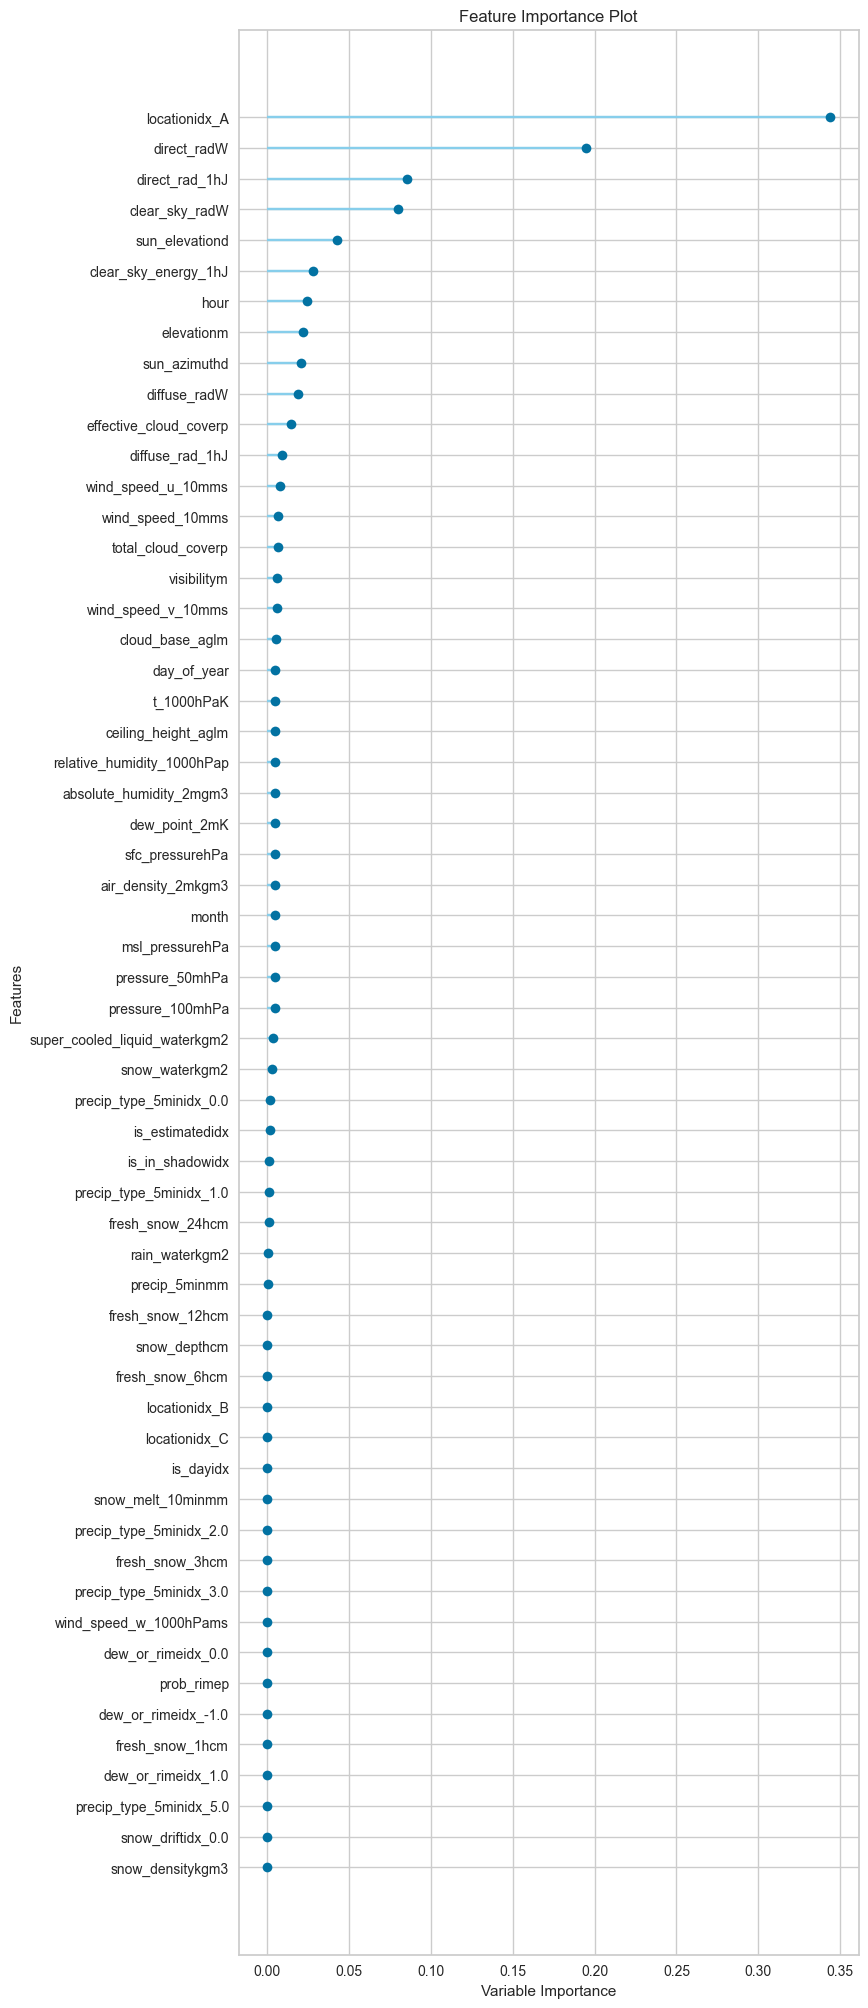

In [48]:
plot_model(extra_trees, plot="feature_all")
# plot_model(gump, plot="feature_all")

In [49]:
test_data = pipin.get_combined_test_data()

In [50]:

def get_unique_filename(base_name, folder = "submissions"):
    end = ""
    if folder == "models":
        end = ".pkl"
    
    file_path = Path(folder) / f"{base_name}.csv{end}"
    count = 1
    while file_path.exists():
        file_path = Path(folder) / f"{base_name}_{count}.csv{end}"
        count += 1
    return str(file_path)

In [52]:
# res_goose = predict_model(lightgbm, test_data)
res_stack = predict_model(extra_trees, test_data)
res_stack = res_stack[["prediction_label"]].rename(columns={"prediction_label": "prediction"}).rename_axis(index="id")
res_stack.to_csv(get_unique_filename('xt_all_data_no_group'))
# save_model(extra_trees, model_name=get_unique_filename('stack_gbm_et_rf', "models"))


In [145]:
print("done", res_stack.shape)
pipin.compare_mae(res_stack)


done (2160, 1)


79.5203383196451